In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

data_dir = "/content/drive/MyDrive/RockPaperScissorsAI/Training"
val_dir = "/content/drive/MyDrive/RockPaperScissorsAI/Validation"

batch_size = 32
img_height = 160
img_width = 160

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  labels='inferred',
  seed=1234,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  val_dir,
  labels='inferred',
  seed=1234,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 15005 files belonging to 4 classes.
Found 3200 files belonging to 4 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)
class_names_val = val_ds.class_names
print(class_names_val)

['None', 'Paper', 'Rock', 'Scissors']
['None', 'Paper', 'Rock', 'Scissors']


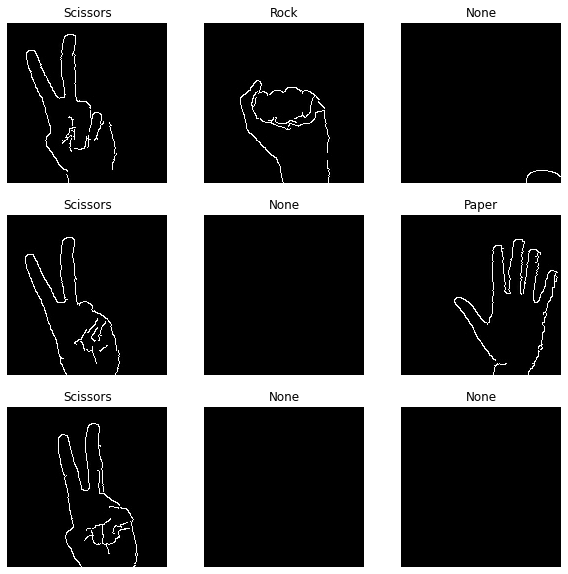

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline
plt.close('all')

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
import numpy as np

for image_batch, labels_batch in val_ds.take(1):
  print(np.shape(image_batch))
  print(type(image_batch))
  print(np.shape(labels_batch))
  print(type(labels_batch))
  break

(32, 160, 160, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
(32,)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(160,160,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu") (x)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu") (x)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(filters = 128, kernel_size = 3, activation = "relu") (x)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation = "relu") (x)
x = layers.Flatten() (x)
x = layers.Dropout(0.2) (x)
outputs = layers.Dense(4, activation="softmax") (x)

model = keras.Model(inputs, outputs)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 160, 160, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 79, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 77, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                         

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = "adam",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="/content/drive/MyDrive/RockPaperScissorsAI",
        save_best_only = True,
        monitor = "val_accuracy")
]

history = model.fit(train_ds, validation_data=val_ds, epochs = 8, callbacks=callbacks)

Epoch 1/8
469/469 [==============================] - 870s 2s/step - loss: 0.0655 - accuracy: 0.9811 - val_loss: 0.1457 - val_accuracy: 0.9712
Epoch 2/8
469/469 [==============================] - 37s 77ms/step - loss: 0.0054 - accuracy: 0.9981 - val_loss: 0.3981 - val_accuracy: 0.9453
Epoch 3/8
469/469 [==============================] - 38s 81ms/step - loss: 0.0046 - accuracy: 0.9983 - val_loss: 0.2546 - val_accuracy: 0.9772
Epoch 4/8
469/469 [==============================] - 37s 78ms/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.2217 - val_accuracy: 0.9744
Epoch 5/8
469/469 [==============================] - 37s 78ms/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.2802 - val_accuracy: 0.9500
Epoch 6/8
469/469 [==============================] - 37s 77ms/step - loss: 0.0055 - accuracy: 0.9989 - val_loss: 0.4215 - val_accuracy: 0.9516
Epoch 7/8
469/469 [==============================] - 37s 77ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.2020 - val_accuracy: 0.9753


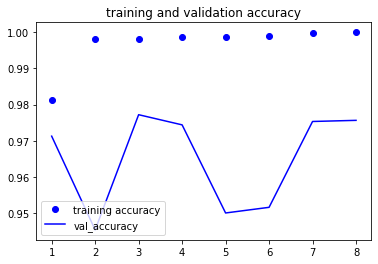

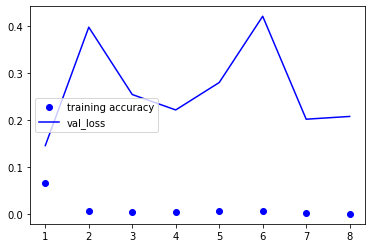

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="training accuracy")
plt.plot(epochs, val_accuracy, "b", label="val_accuracy")
plt.title("training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="training accuracy")
plt.plot(epochs, val_loss, "b", label="val_loss")
plt.legend()
plt.show()



In [ ]:
import tensorflow as tf

data_dir = "/content/drive/MyDrive/RockPaperScissorsAI/Test"

batch_size = 32
img_height = 160
img_width = 160

test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  labels='inferred',
  seed=1234,
  image_size=(img_height, img_width),
  batch_size=batch_size)

import keras

test_model = keras.models.load_model("/content/drive/MyDrive/RockPaperScissorsAI")
test_loss, test_acc = test_model.evaluate(test_ds)
print(test_acc)

Found 2400 files belonging to 4 classes.
75/75 [==============================] - 676s 8s/step - loss: 0.1703 - accuracy: 0.9837
0.9837499856948853


<class 'tensorflow.python.framework.ops.EagerTensor'>
(32, 160, 160, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
(160, 160, 3)
im  100.0  % sure that it is
Paper


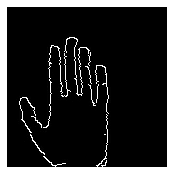

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  print(type(images))
  print(np.shape(images))
  for i in range(1):
    print(type(images[i]))
    print(np.shape(images[i]))
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    prediction = test_model.predict(images, batch_size=1)[0]
    max_value = float(max(prediction))
    max_index_col = np.argmax(prediction, axis=0)
    print("im ", (prediction[max_index_col] / 1) * 100, " % sure that it is")
    print(class_names[max_index_col])

    plt.axis("off")

In [ ]:
test_model.save('rps_model.h5')
from google.colab import files
files.download('rps_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>